In [1]:
import numpy as np
import seaborn as sns
import categorization as cat
import scipy.spatial.distance as dist
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from HiPart.clustering import DePDDP
from HiPart import visualizations as viz

2023-10-23 23:04:43.173994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 23:04:43.828472: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-23 23:04:43.828536: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-23 23:04:43.828543: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
ecosetRepFile = "./representations/ecosetReps.npy"
ecosetReps = np.load(ecosetRepFile)
ecosetReps.shape  # Model, image, rep, rep, rep

(10, 800, 5, 5, 4096)

<AxesSubplot: ylabel='Density'>

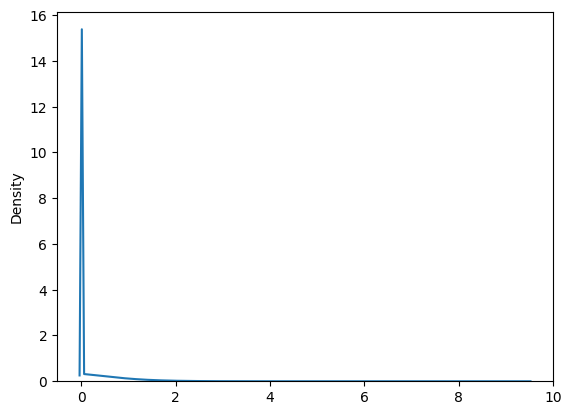

In [3]:
# Create KDE
sns.kdeplot(ecosetReps.reshape(10, -1)[0])

In [4]:
np.sort(ecosetReps.reshape(10, -1)[0])[::-1][:40]

array([9.489296 , 9.41915  , 9.401225 , 9.3423   , 9.20692  , 9.012685 ,
       8.980971 , 8.96843  , 8.9575815, 8.937443 , 8.936327 , 8.916255 ,
       8.855174 , 8.814647 , 8.7833185, 8.766338 , 8.727353 , 8.705983 ,
       8.7047825, 8.668722 , 8.656558 , 8.643278 , 8.620495 , 8.610479 ,
       8.601033 , 8.589037 , 8.585743 , 8.425695 , 8.355839 , 8.348903 ,
       8.328171 , 8.326214 , 8.304392 , 8.277966 , 8.255216 , 8.239977 ,
       8.199338 , 8.192115 , 8.180213 , 8.175612 ], dtype=float32)

In [5]:
np.median(ecosetReps.reshape(10, -1)[0])

0.0

In [6]:
# Preallocate array for similarity matrices
ecosetSimMat = np.zeros((10, 800, 800), dtype=np.float32)

# Loop through models
for i, modelReps in enumerate(ecosetReps):
    # Flatten model reps
    modelReps = modelReps.reshape(modelReps.shape[0], -1)

    # Calculate similarity matrix using default GCM
    ecosetSimMat[i] = cat.default_gcm_sim_mat(modelReps)

In [7]:
ecosetSimMat

array([[[1.        , 0.6017475 , 0.6230957 , ..., 0.54849964,
         0.5282454 , 0.52151877],
        [0.6017475 , 1.        , 0.5796788 , ..., 0.5245114 ,
         0.5049486 , 0.5019908 ],
        [0.6230957 , 0.5796788 , 1.        , ..., 0.53115517,
         0.5185499 , 0.5008697 ],
        ...,
        [0.54849964, 0.5245114 , 0.53115517, ..., 1.        ,
         0.6121496 , 0.6101775 ],
        [0.5282454 , 0.5049486 , 0.5185499 , ..., 0.6121496 ,
         1.        , 0.5865789 ],
        [0.52151877, 0.5019908 , 0.5008697 , ..., 0.6101775 ,
         0.5865789 , 1.        ]],

       [[1.        , 0.59875166, 0.6159241 , ..., 0.5502107 ,
         0.5353907 , 0.54832226],
        [0.59875166, 1.        , 0.57949007, ..., 0.526449  ,
         0.5100704 , 0.52772737],
        [0.6159241 , 0.57949007, 1.        , ..., 0.51978827,
         0.50850874, 0.5110535 ],
        ...,
        [0.5502107 , 0.526449  , 0.51978827, ..., 1.        ,
         0.5959505 , 0.60551155],
        [0.5

In [8]:
# Preallocate array for similarity matrices
ecosetTruncate1SimMat = np.zeros((10, 800, 800), dtype=np.float32)

# Loop through models
for i, modelReps in enumerate(ecosetReps):
    # Flatten model reps
    truncateReps = modelReps.reshape(modelReps.shape[0], -1)

    # Make activations lower than 1 equal to 0
    truncateReps[truncateReps < 1] = 0

    # Calculate similarity matrix using default GCM
    ecosetTruncate1SimMat[i] = cat.default_gcm_sim_mat(truncateReps)

In [9]:
np.prod(ecosetSimMat.shape)

6400000

In [10]:
np.corrcoef(ecosetSimMat.reshape(-1), ecosetTruncate1SimMat.reshape(-1))

array([[1.        , 0.95740528],
       [0.95740528, 1.        ]])

In [11]:
# Preallocate array for similarity matrices
ecosetTruncate2SimMat = np.zeros((10, 800, 800), dtype=np.float32)

# Loop through models
for i, modelReps in enumerate(ecosetReps):
    # Flatten model reps
    truncateReps = modelReps.reshape(modelReps.shape[0], -1)

    # Make activations lower than 2 equal to 0
    truncateReps[truncateReps < 2] = 0

    # Calculate similarity matrix using default GCM
    ecosetTruncate2SimMat[i] = cat.default_gcm_sim_mat(truncateReps)

In [12]:
np.corrcoef(ecosetSimMat.reshape(-1), ecosetTruncate2SimMat.reshape(-1))

array([[1.       , 0.6816256],
       [0.6816256, 1.       ]])

In [13]:
np.corrcoef(ecosetTruncate1SimMat.reshape(-1), ecosetTruncate2SimMat.reshape(-1))

array([[1.        , 0.84985129],
       [0.84985129, 1.        ]])

In [14]:
threshedSimMat = np.zeros((10, 800, 800), dtype=np.float32)

# Loop through models
for i, modelReps in enumerate(ecosetReps):
    # Flatten model reps
    modelReps = modelReps.reshape(modelReps.shape[0], -1)

    # Calculate similarity matrix using default GCM
    threshedSimMat[i] = dist.squareform(
        dist.pdist(modelReps, metric=cat.gcm_sim_thresholded)
    )

In [15]:
np.corrcoef(ecosetSimMat.reshape(-1), threshedSimMat.reshape(-1))

array([[1.        , 0.61121236],
       [0.61121236, 1.        ]])

In [16]:
threshed2SimMat = np.zeros((10, 800, 800), dtype=np.float32)

# Loop through models
for i, modelReps in enumerate(ecosetReps):
    # Flatten model reps
    modelReps = modelReps.reshape(modelReps.shape[0], -1)

    # Calculate similarity matrix using default GCM
    threshed2SimMat[i] = dist.squareform(
        dist.pdist(
            modelReps, metric=lambda x, y: cat.gcm_sim_thresholded(x, y, threshold=3)
        )
    )

In [17]:
np.corrcoef(ecosetSimMat.reshape(-1), threshed2SimMat.reshape(-1))

array([[1.        , 0.63538746],
       [0.63538746, 1.        ]])

In [18]:
np.corrcoef(threshedSimMat.reshape(-1), threshed2SimMat.reshape(-1))

array([[1.        , 0.75080792],
       [0.75080792, 1.        ]])

In [19]:
threshReps = ecosetReps[0] > 1
threshReps = threshReps.reshape(threshReps.shape[0], -1)
np.mean(np.sum(threshReps, axis=1))

1351.16375

<AxesSubplot: ylabel='Density'>

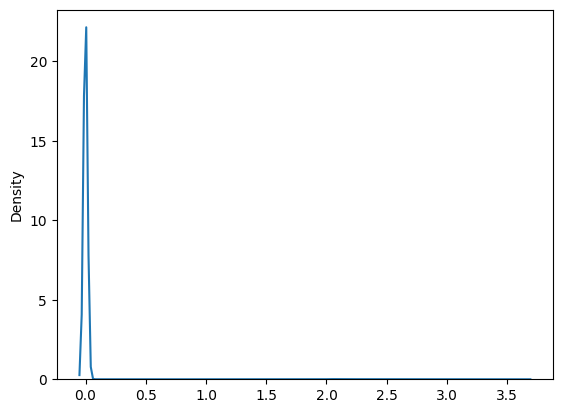

In [20]:
sns.kdeplot(ecosetReps[0].reshape(ecosetReps[0].shape[0], -1)[0])

<AxesSubplot: ylabel='Density'>

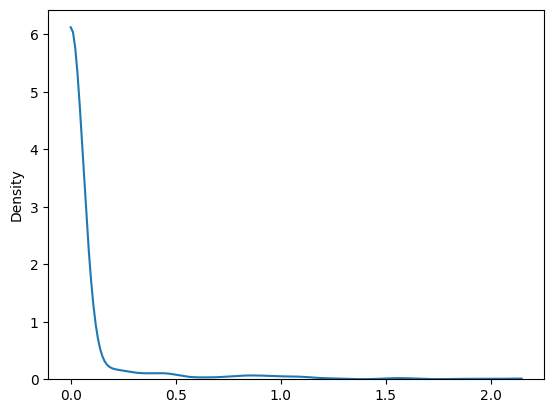

In [21]:
sns.kdeplot(
    np.concatenate([np.zeros(1024 - 128), np.random.gamma(1, 0.5, size=128)]), cut=0
)

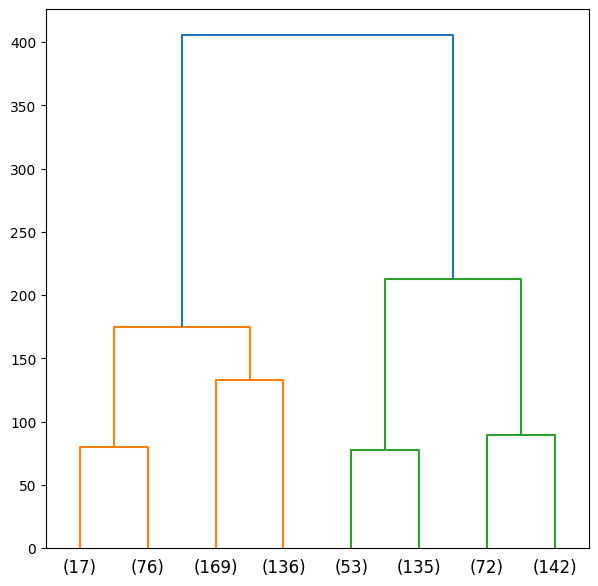

In [4]:
ecosetPooledReps = np.mean(ecosetReps[0], axis=(1, 2))

# Cluster exemplars
ecosetLinkage = cluster.AgglomerativeClustering(
    n_clusters=8, linkage="ward", metric="euclidean", compute_distances=True
)
ecosetLinkage.fit(ecosetPooledReps)


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


fig, ax = plt.subplots(1, 1, figsize=(7, 7))

plot_dendrogram(ecosetLinkage, truncate_mode="level", p=2)

In [51]:
clustering = DePDDP(
    max_clusters_number=4,
).fit(ecosetPooledReps)

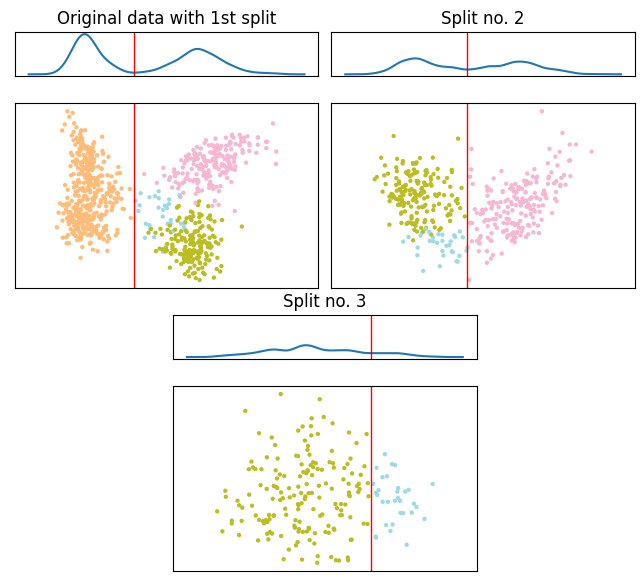

In [52]:
spl_viz = viz.split_visualization(clustering)
spl_viz.show()

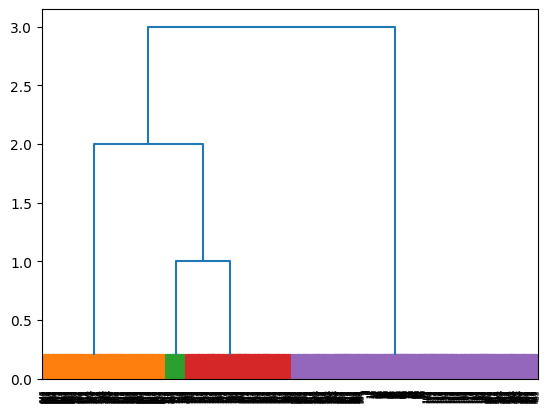

In [53]:
dendrogram_viz = viz.dendrogram_visualization(clustering)

[[0.         0.         1.         1.         2.11597789 2.11597789
  2.11602832 2.11602832]
 [0.         0.         1.         1.         2.11597789 2.11597789
  2.11602832 2.11602832]
 [1.         1.         0.         0.         2.12945004 2.12945004
  2.12379477 2.12379477]
 [1.         1.         0.         0.         2.12945004 2.12945004
  2.12379477 2.12379477]
 [2.11597789 2.11597789 2.12945004 2.12945004 0.         0.
  1.         1.        ]
 [2.11597789 2.11597789 2.12945004 2.12945004 0.         0.
  1.         1.        ]
 [2.11602832 2.11602832 2.12379477 2.12379477 1.         1.
  0.         0.        ]
 [2.11602832 2.11602832 2.12379477 2.12379477 1.         1.
  0.         0.        ]]


/data/venv/research2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


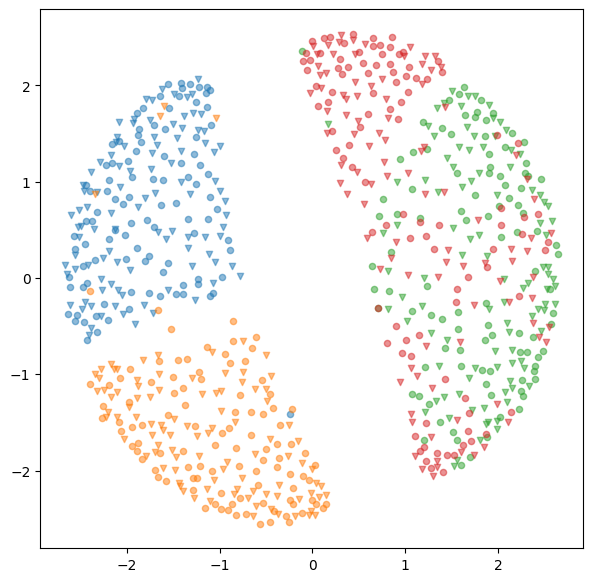

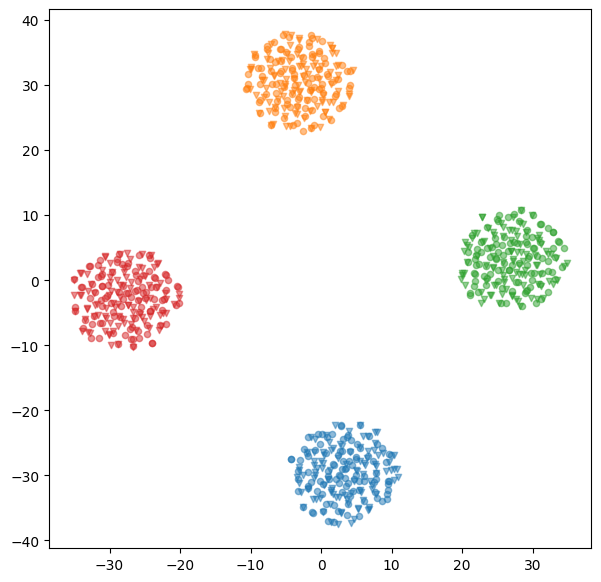

In [2]:
subExemplars, subCentroids = cat.make_categories(
    catRadius=2,
    super_rad=1,
    basic_rad=0.5,
    sub_rad=0.0,
    nFeatures=1024,
    nImages=100,
)

# Calculate similarity matrix
subSimMat = dist.squareform(dist.pdist(subExemplars, metric="euclidean"))

# Calculate similarity matrix of centroids
subCentroidSimMat = dist.squareform(dist.pdist(subCentroids, metric="euclidean"))
print(subCentroidSimMat)

# Do MDS
tmp = MDS(
    n_components=2,
    dissimilarity="precomputed",
)
subMDS = tmp.fit_transform(subSimMat)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
colors = sns.color_palette(n_colors=4)
for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subMDS[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subMDS[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

# Do tsne
tmp = TSNE(n_components=2, metric="precomputed", init="random")
subTSNE = tmp.fit_transform(subSimMat)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subTSNE[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subTSNE[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

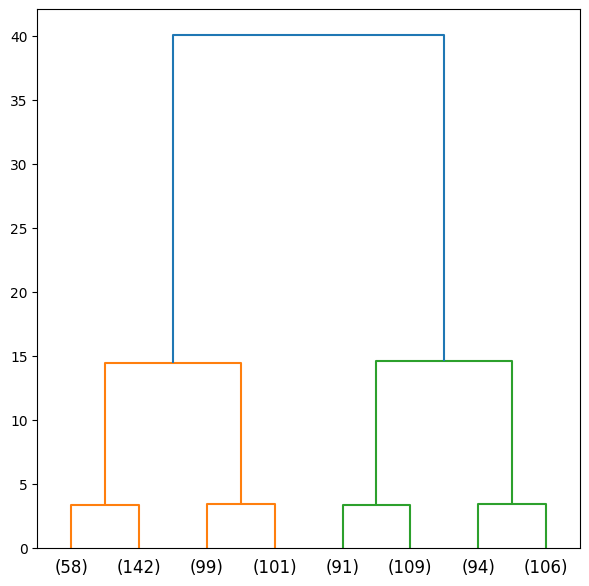

In [229]:
# Cluster exemplars
simLinkage = cluster.AgglomerativeClustering(
    n_clusters=8, linkage="ward", metric="euclidean", compute_distances=True
)
simLinkage.fit(subExemplars)


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


fig, ax = plt.subplots(1, 1, figsize=(7, 7))

plot_dendrogram(simLinkage, truncate_mode="level", p=2)

In [3]:
superLabels = np.concatenate([np.repeat(i, 400) for i in range(2)])
basicLabels = np.concatenate([np.repeat(i, 200) for i in range(4)])
subLabels = np.concatenate([np.repeat(i, 100) for i in range(8)])

# Concatenate labels into columns
hierLabels = np.concatenate([superLabels, basicLabels, subLabels]).reshape(3, -1).T
hierLabels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [1, 3, 7],
       [1, 3, 7],
       [1, 3, 7]])

In [ ]:
clustering = DePDDP(max_clusters_number=8).fit(subExemplars)

In [5]:
cophenet(viz.linkage(clustering))

: 

In [232]:
def get_nodes_at_level(tree, level):
    """Return a list of nodes at a given level of the tree"""
    return [
        i.identifier for i in tree.all_nodes_itr() if tree.level(i.identifier) == level
    ]


def get_leaves_from_node(tree, node):
    """Return the indices of the items (leaves) from a given node"""
    leafList = [leaf.data["indices"] for leaf in tree.leaves(node)]
    return np.concatenate(leafList)


import sklearn.metrics as metrics


def external_evaluate_over_levels(tree, labels, metric):
    levels = range(1, labels.shape[1] + 1)
    nLeaves = len(tree.get_node(0).data["indices"])

    for level in levels:
        levelLabels = labels[:, level - 1]
        nodes = get_nodes_at_level(tree, level)
        levelPred = np.repeat(-1, nLeaves)
        for i, node in enumerate(nodes):
            leaves = get_leaves_from_node(tree, node)

            levelPred[leaves] = i

        # Calculate external metric
        print(f"Level {level}: {metric(levelLabels, levelPred)}")

    return None


def internal_evaluate_over_levels(tree, reps, metric):
    maxLevel = max([tree.level(i.identifier) for i in tree.all_nodes_itr()]) + 1
    levels = range(1, maxLevel)
    nLeaves = len(tree.get_node(0).data["indices"])

    for level in levels:
        nodes = get_nodes_at_level(tree, level)
        levelPred = np.repeat(-1, nLeaves)
        for i, node in enumerate(nodes):
            leaves = get_leaves_from_node(tree, node)

            levelPred[leaves] = i

        # Calculate internal metric
        print(f"Level {level}: {metric(reps, levelPred)}")

    return None


# Adjusted rand score
print("Adjusted Rand score:")
external_evaluate_over_levels(clustering.tree, hierLabels, metrics.adjusted_rand_score)

# Mutual information
print("Adjusted Mutual information:")
external_evaluate_over_levels(
    clustering.tree, hierLabels, metrics.adjusted_mutual_info_score
)

# V-measure
print("V-measure:")
external_evaluate_over_levels(clustering.tree, hierLabels, metrics.v_measure_score)

# Fowlkes-Mallows
print("Fowlkes-Mallows:")
external_evaluate_over_levels(
    clustering.tree, hierLabels, metrics.fowlkes_mallows_score
)

# Davies-Bouldin
print("Davies-Bouldin:")
internal_evaluate_over_levels(
    clustering.tree, subExemplars, metrics.davies_bouldin_score
)

# Silhouette score
print("Silhouette score:")
internal_evaluate_over_levels(clustering.tree, subExemplars, metrics.silhouette_score)

# Calinski_harabasz
print("Calinski-Harabasz:")
internal_evaluate_over_levels(
    clustering.tree, subExemplars, metrics.calinski_harabasz_score
)

Adjusted Rand score:
Level 1: 1.0
Level 2: 1.0
Level 3: 0.13697515800815133
Adjusted Mutual information:
Level 1: 1.0
Level 2: 1.0
Level 3: 0.4039286372501911
V-measure:
Level 1: 1.0
Level 2: 1.0
Level 3: 0.40784356551269263
Fowlkes-Mallows:
Level 1: 1.0
Level 2: 1.0
Level 3: 0.4190514859648095
Davies-Bouldin:
Level 1: 2.055670461717255
Level 2: 3.8861441773642325
Level 3: 6.538196821126145
Level 4: 3.813400530507041
Level 5: 3.5234740322031093
Silhouette score:
Level 1: 0.1753104031085968
Level 2: 0.05786208063364029
Level 3: 0.034116826951503754
Level 4: -0.0013483476359397173
Level 5: -0.0055144596844911575
Calinski-Harabasz:
Level 1: 188.82945863513683
Level 2: 84.51324741556243
Level 3: 34.734493395936646
Level 4: 5.447473856340898
Level 5: 3.1472928260417383


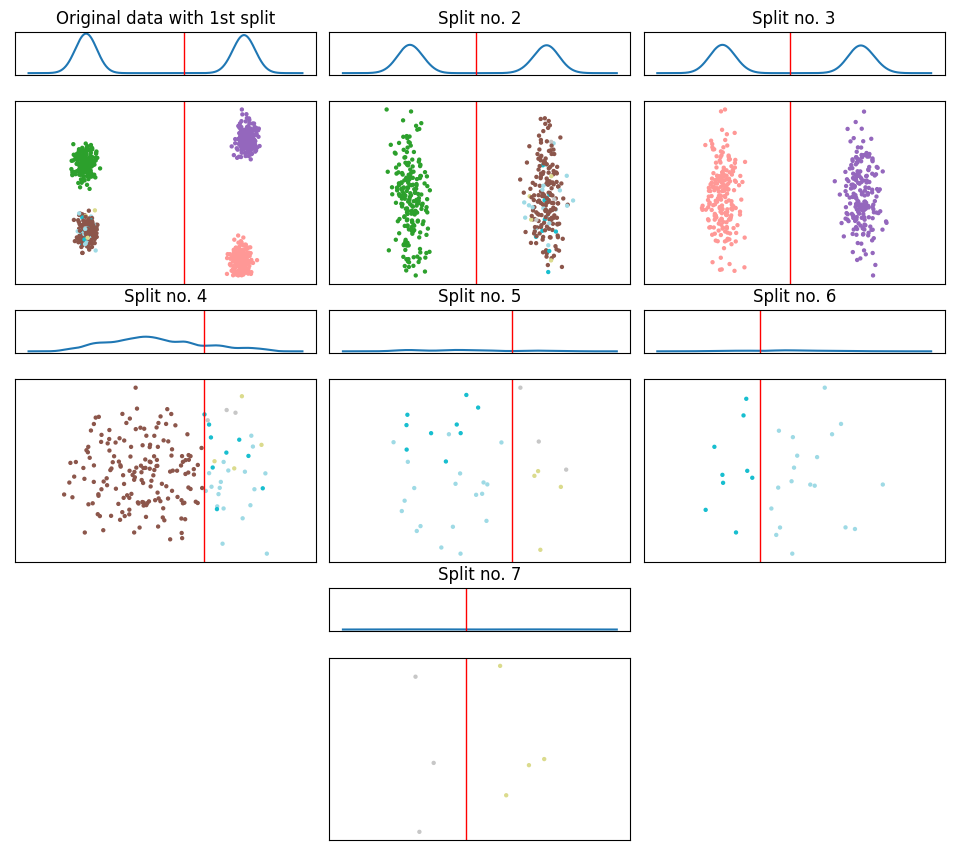

In [233]:
spl_viz = viz.split_visualization(clustering)
spl_viz.show()

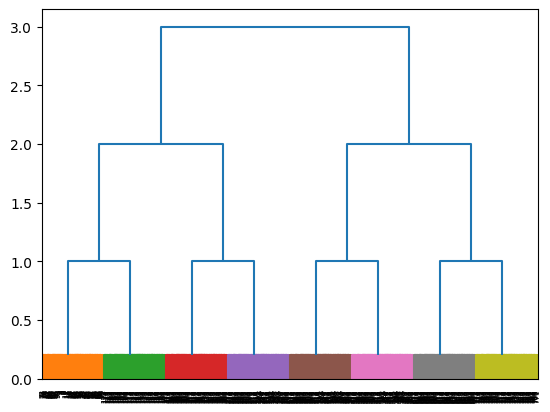

In [50]:
dendrogram_viz = viz.dendrogram_visualization(clustering)

In [47]:
simLinkage.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6,

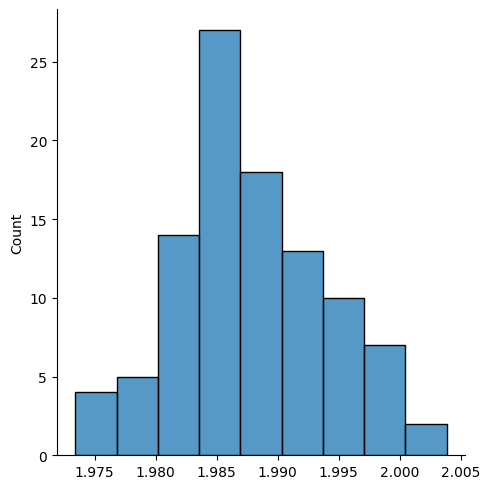

In [19]:
# Filter for the first 100 exemplars
simCat = subExemplars[:100]

# Calculate the center
simCentroid = np.mean(simCat, axis=0)

# Calculate the distance between each exemplar and center
simDist = np.linalg.norm(simCat - simCentroid, axis=1)

# Plot histogram
sns.displot(simDist)

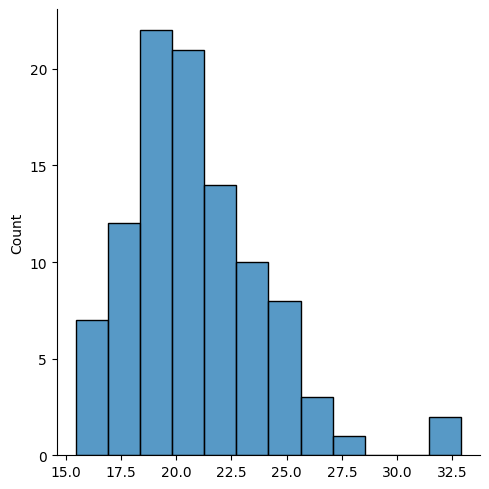

In [66]:
# Filter for the first 100 exemplars
simCat = ecosetPooledReps[:100]

# Calculate the center
center = np.mean(simCat, axis=0)

# Calculate distance between each exemplar and center
distances = np.linalg.norm(simCat - center, axis=1)

# # Plot histogram
sns.displot(distances, kde=False)

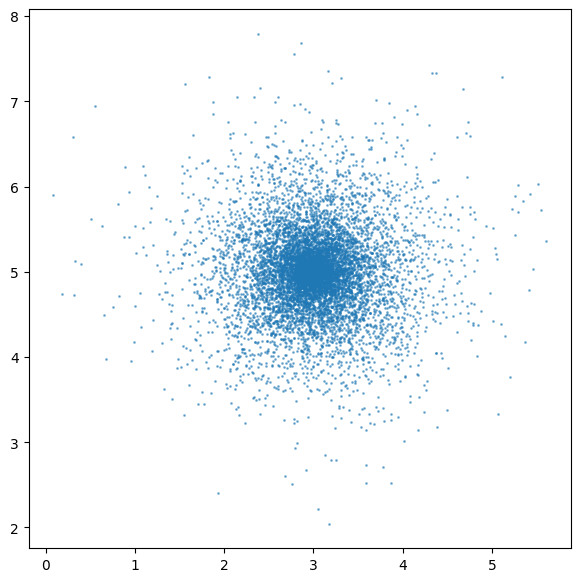

In [103]:
# Plot coordinates of first 2 dimensions
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.scatter(coords[:, 0], coords[:, 1], s=1, alpha=0.5)

In [57]:
# Calculate distance matrix of coords
distMat = dist.squareform(dist.pdist(coords, metric="euclidean"))

# Plot histogram of distances
sns.distplot(distMat.reshape(-1), kde=False)

NameError: name 'coords' is not defined

[[ 0.         25.95409615 26.88983712 ... 29.85300508 28.92877114
  28.28864764]
 [25.95409615  0.         26.27693057 ... 28.64186417 27.66545915
  28.11803198]
 [26.88983712 26.27693057  0.         ... 30.35709443 28.9663088
  29.00385418]
 ...
 [29.85300508 28.64186417 30.35709443 ...  0.         27.28063734
  27.55804729]
 [28.92877114 27.66545915 28.9663088  ... 27.28063734  0.
  26.25425795]
 [28.28864764 28.11803198 29.00385418 ... 27.55804729 26.25425795
   0.        ]]


/data/venv/research2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


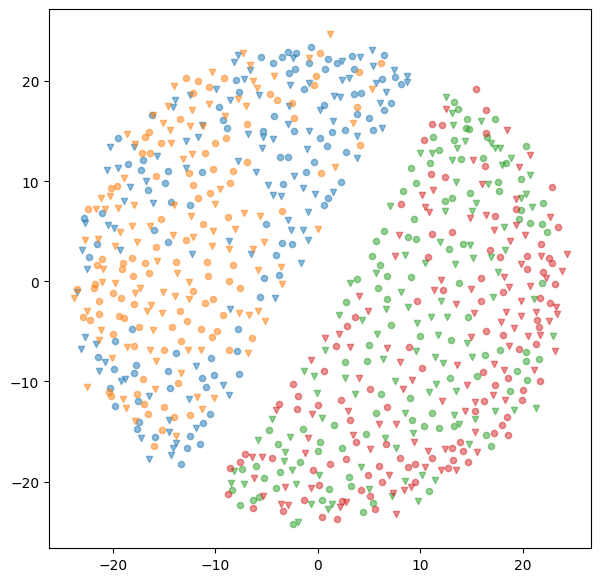

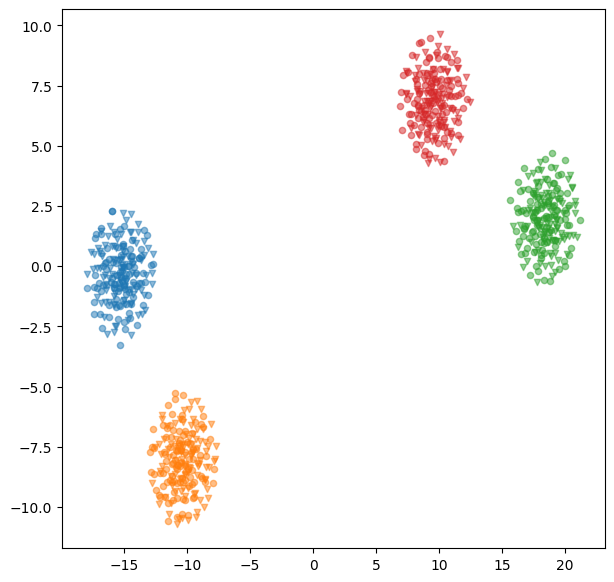

In [23]:
subExemplarsRelu = subExemplars.copy()
subExemplarsRelu[subExemplarsRelu < 0] = 0

# Calculate similarity matrix
subSimMatRelu = dist.squareform(dist.pdist(subExemplarsRelu, metric="euclidean"))
print(subSimMatRelu)

# Do MDS
tmp = MDS(
    n_components=2,
    dissimilarity="precomputed",
)
subMDSRelu = tmp.fit_transform(subSimMatRelu)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
colors = sns.color_palette(n_colors=4)
for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subMDSRelu[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subMDSRelu[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

# Do tsne
tmp = TSNE(n_components=2, metric="precomputed", init="random")
subTSNERelu = tmp.fit_transform(subSimMatRelu)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subTSNERelu[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subTSNERelu[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

<AxesSubplot: ylabel='Density'>

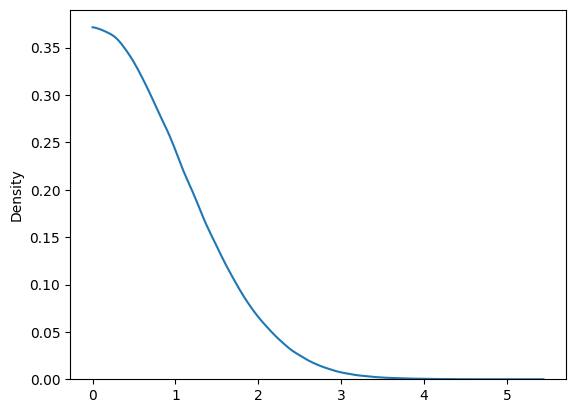

In [24]:
# Draw KDE of exemplar activations
sns.kdeplot(subExemplars.reshape(-1), clip=(0, None))

/data/venv/research2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


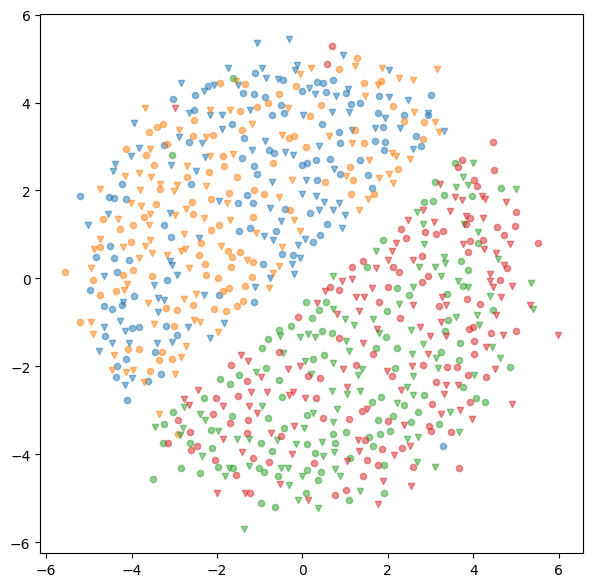

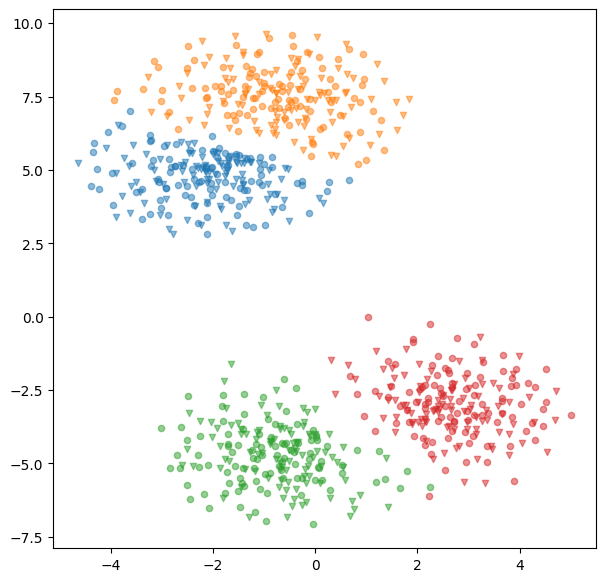

In [25]:
# Transform exemplars to be more gamma-like
subExemplarsGamma = subExemplars.copy()
subExemplarsGamma[subExemplarsGamma < 0] = 0
subExemplarsGamma = subExemplarsGamma**2 / 10

# Calculate similarity matrix
subSimMatGamma = dist.squareform(dist.pdist(subExemplarsGamma, metric="euclidean"))

# Do MDS
tmp = MDS(
    n_components=2,
    dissimilarity="precomputed",
)
subMDSGamma = tmp.fit_transform(subSimMatGamma)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
colors = sns.color_palette(n_colors=4)

for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subMDSGamma[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subMDSGamma[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

# Do tsne
tmp = TSNE(n_components=2, metric="precomputed", init="random")
subTSNEGamma = tmp.fit_transform(subSimMatGamma)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Every 200 dots change colors
for i in range(4):
    # Every 100 dots change shapes
    for j in range(2):
        ax.scatter(
            subTSNEGamma[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 0],
            subTSNEGamma[(i * 200 + j * 100) : (i * 200 + j * 100 + 100), 1],
            s=20,
            alpha=0.5,
            color=colors[i],
            marker="o" if j == 0 else "v",
        )

<AxesSubplot: ylabel='Density'>

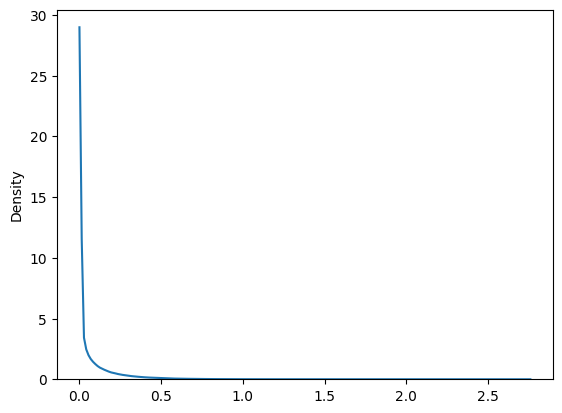

In [26]:
# Draw KDE of exemplar activations
sns.kdeplot(subExemplarsGamma.reshape(-1), clip=(0, None))